# Data Mining Final Project
## Gold Price vs. Crude Oil Price

#### Gold is an important store of value today and it has been a good indicator for the world economy for decades. The value of gold is usually fairly stable and increase steadily over time. And an increase in gold price usually suggests a bad state of economy, such as a recession, or a decreasing trend in economy. 

#### Crude oil is an important energy resources. With the large import of crude oil from different resources area, the fluctuation of crude oil price is another indicator for the world economy. A rise in crude oil price affect the importer countries and indicating a bad state in the economy also. 

#### With the significance explained as above, we started to wonder if gold and crude oil price have a relationship with each other. To tackle this problem, we obtained monthly data for gold price and crude oil price from the Internet [1]. Since the date for gold price data starts at 1950 while that for crude oil price data starts at 1980, we reduced the data of gold price to have a starting date at January 1st, 1974 such that both of them can be compared within the same range without any missing data. After the cleaning of data, our dataset contains a total of 504 observations. 

In [67]:
import pandas as pd

In [68]:
df_crude_oil = pd.read_csv("crude oil earlier.csv", skiprows = 3, names = ['Date', 'crude oil price'])

In [69]:
df_gold_price = pd.read_csv("gold price.csv")

In [70]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [71]:
dates = pd.to_datetime(df_gold_price['date'])

In [72]:
df_gold_price = df_gold_price.set_index(dates)

In [73]:
df_gold_price = df_gold_price.drop('date', 1)

In [74]:
dates_crude_oil = pd.to_datetime(df_crude_oil['Date'])

In [75]:
df_crude_oil = df_crude_oil.set_index(dates_crude_oil)
df_crude_oil = df_crude_oil.drop('Date', 1)
df_crude_oil = df_crude_oil['crude oil price'].dropna()

In [76]:
df_crude_oil_gold_combine = pd.DataFrame()

#### To see if they actually have similar trends, we would like to put them in the same plot to see if they overlap with each other. However, from the data imported and combined, we can see different scaling for the two resources, because of which, we may not able to see any relationship. To avoid this problem, we normalized our data before plotting, after which, we obtained a plot as follows. 

In [77]:
import numpy as np

In [78]:
frames = [df_crude_oil, df_gold_price]
df_crude_oil_gold_combine = pd.concat(frames, axis=1, join='inner', join_axes=None, ignore_index=False,
       keys=None, levels=None, names=None, verify_integrity=False)

In [79]:
gold_price_mean = df_crude_oil_gold_combine['price'].mean()

In [80]:
gold_price_std = df_crude_oil_gold_combine['price'].std()

In [81]:
data_size = df_crude_oil_gold_combine.index.size

In [82]:
gold_price_normalized = (df_crude_oil_gold_combine['price'] - gold_price_mean)/(gold_price_std/(np.sqrt(data_size)))

In [83]:
crude_oil_price_mean = df_crude_oil_gold_combine['crude oil price'].mean()

In [84]:
crude_oil_price_std = df_crude_oil_gold_combine['crude oil price'].std()

In [85]:
crude_oil_price_normalized = \
(df_crude_oil_gold_combine['crude oil price'] - crude_oil_price_mean)/(crude_oil_price_std/(np.sqrt(data_size)))

In [86]:
df_crude_oil_gold_combine['gold normalized price'] = gold_price_normalized
df_crude_oil_gold_combine['crude oil normalized price'] = crude_oil_price_normalized

In [87]:
df_x = pd.rolling_corr(df_crude_oil_gold_combine['price'], df_crude_oil_gold_combine['crude oil price'], 50)

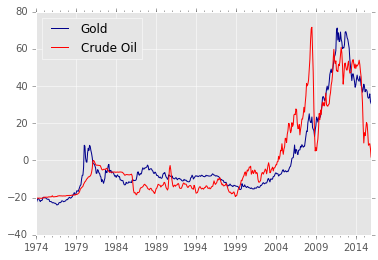

In [88]:
ax = df_crude_oil_gold_combine.plot(kind='line', x = df_crude_oil_gold_combine.index, 
                                    y = 'gold normalized price', color='DarkBlue', label='Gold')
df_crude_oil_gold_combine.plot(kind='line', x = df_crude_oil_gold_combine.index, 
                               y = 'crude oil normalized price', color='Red', label='Crude Oil', ax = ax)

#### As we can see from the plot on the left, the normalized gold price and crude oil price show similar trends, which indicating that there may exist a strong relationship between the two resources.

#### From the combined plots, we found that both of them had a large increase between 2004 and 2008. And from 2004 to 2008, both of the prices dropped a significant amount. This significant decrease may be one of the results caused by the Great Recession during year 2008 and 2009. The Great Recession was a period of time when economic decline hit the world market. It began around the end 2007 and didn’t end until mid-2009. This matches with the time when both prices of the resources dropped significantly. Also, we found that there is a sharp increase around 1979. 

In [89]:
df_crude_oil_gold_combine['crude oil normalized price'].corr(df_crude_oil_gold_combine['gold normalized price'])

0.89616000011995867

#### Doing a corr function as above, we can see that the correlation between the gold price and crude oil price using the normalized data is about 0.8962, which is relatively large. This indicates that crude oil price and gold price are correlated strongly. Using this, it is plausible that the crude oil price has a similar trend as the gold price.

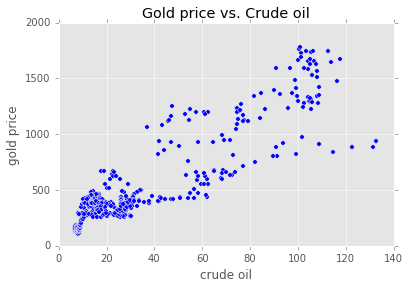

In [90]:
plt.scatter(x = df_crude_oil_gold_combine['crude oil price'], y = df_crude_oil_gold_combine['price'])
plt.title("Gold price vs. Crude oil")
plt.xlabel("crude oil")
plt.ylabel("gold price")

#### To see if there exists a relation between gold price and crude oil price, we generated the scatter plot above, there seems to be an overall trend but does not seem very linear since data seems split with crude oil greater than 40. This may give us a clue that using a linear fit to predict gold price based on crude oil may not be appropriate.

#### In order to check the possibility that the correlation between the gold price and crude oil price is due to price index, we gathered the data for price index in the history and did the following analysis.

In [140]:
price_indx = pd.read_excel('Price Index.xls')

In [141]:
dates = pd.to_datetime(price_indx.DATE)
price_indx = price_indx.drop('DATE', 1)
price_indx = price_indx.set_index(dates)

In [142]:
frames_three = [df_crude_oil, df_gold_price, price_indx]
df_crude_oil_gold_price_index_combine = pd.concat(frames_three, axis=1, join='inner', join_axes=None, ignore_index=False,
       keys=None, levels=None, names=None, verify_integrity=False)

In [143]:
price_index_mean = df_crude_oil_gold_price_index_combine['VALUE'].mean()

In [144]:
price_index_std = df_crude_oil_gold_price_index_combine['VALUE'].std()

In [145]:
data_size = df_crude_oil_gold_price_index_combine.index.size

In [146]:
price_index_normalized = (df_crude_oil_gold_price_index_combine['VALUE'] - price_index_mean)/(price_index_std/(np.sqrt(data_size)))

In [147]:
df_crude_oil_gold_price_index_combine['price_index_normalized'] = price_index_normalized

In [148]:
gold_mean = df_crude_oil_gold_price_index_combine['price'].mean()

In [149]:
gold_std = df_crude_oil_gold_price_index_combine['price'].std()
gold_norm = (df_crude_oil_gold_price_index_combine['price'] - gold_mean)/(gold_std/(np.sqrt(data_size)))
df_crude_oil_gold_price_index_combine['gold_norm'] = gold_norm

In [150]:
crude_mean = df_crude_oil_gold_price_index_combine['crude oil price'].mean()
crude_std = df_crude_oil_gold_price_index_combine['crude oil price'].std()
crude_norm = (df_crude_oil_gold_price_index_combine['crude oil price'] - crude_mean)/(crude_std/(np.sqrt(data_size)))
df_crude_oil_gold_price_index_combine['crude_norm'] = crude_norm

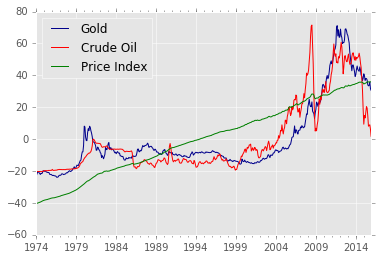

In [151]:
ax_1 = df_crude_oil_gold_price_index_combine.plot(kind='line', x = df_crude_oil_gold_price_index_combine.index, 
                                    y = 'gold_norm', color='DarkBlue', label='Gold')
df_crude_oil_gold_price_index_combine.plot(kind='line', x = df_crude_oil_gold_price_index_combine.index, 
                               y = 'crude_norm', color='Red', label='Crude Oil', ax = ax_1)
df_crude_oil_gold_price_index_combine.plot(kind='line', x = df_crude_oil_gold_price_index_combine.index,
                                          y = 'price_index_normalized', color = 'green', label = 'Price Index', ax = ax_1)

#### From the plot above, we can see that the gold price and crude oil price is hoovering around the line of price index and fluctuating back and forth. From the plot, we are not sure if the effect from the price index on the price exists. Hence, we plotted crude oil price vs. price index and gold price vs. price index individually. If the relation exists, then the plot should look correlated and follow a certain curvature.

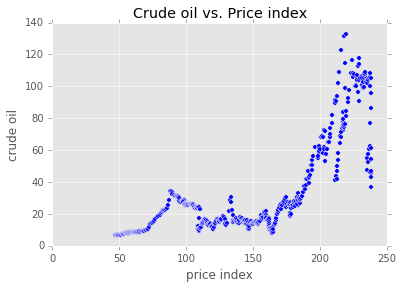

In [152]:
plt.scatter(x = df_crude_oil_gold_price_index_combine['VALUE'], y = df_crude_oil_gold_price_index_combine['crude oil price'])
plt.title("Crude oil vs. Price index")
plt.xlabel("price index")
plt.ylabel("crude oil")

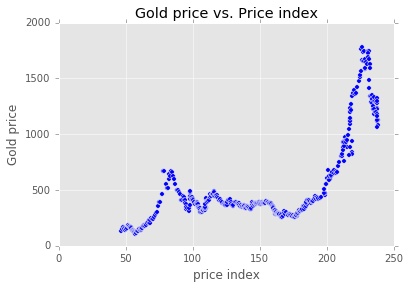

In [153]:
plt.scatter(x = df_crude_oil_gold_price_index_combine['VALUE'], y = df_crude_oil_gold_price_index_combine['price'])
plt.title("Gold price vs. Price index")
plt.xlabel("price index")
plt.ylabel("Gold price")

#### As plotted above, we can see that the individual relation plot still give a similar shape as previous when without counting the effect from price index. Therefore, we have our first piece of evidence that the effect of price index is minor for both of the prices.

In [154]:
res = df_crude_oil_gold_price_index_combine['price_index_normalized'] - df_crude_oil_gold_price_index_combine['gold_norm']

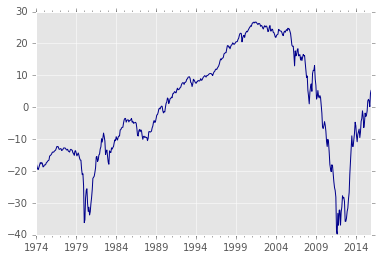

In [155]:
res.plot(kind = "line", x = df_crude_oil_gold_price_index_combine.index, 
                                    y = res, color='DarkBlue')

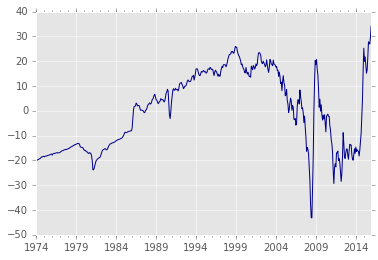

In [156]:
res1 = df_crude_oil_gold_price_index_combine['price_index_normalized'] - df_crude_oil_gold_price_index_combine['crude_norm']
res1.plot(kind = "line", x = df_crude_oil_gold_price_index_combine.index, 
                                    y = res1, color='DarkBlue')

#### To have a further verification, we did a plot on the difference between gold price and price index, and crude oil price and price index. As shown above, the difference is not constant across time, which indicates that the effect of price index on gold price and crude oil price is not substantial.

### After checking each category, we can conclude that there exists a correlation between gold price and crude oil price. And with a correlation around 0.89, the correlation can be seen to be pretty substantial. This makes sense since both crude oil price and gold price can be used to assess current economy and indicate the future state of economy. Moreover, a rise in oil prices indicates a bad economy state, which at the same time the gold prices would increase since a increase in gold prices usually suggests a recession and bad state.  